In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
pd.set_option('display.max_columns', None)

boscun = pd.read_csv('BOS_CUN_trips1M.csv')

In [2]:
boscun.head()

,messageid,tripindex,received,currency,total,tax,surcharge,source,merchant,majorcarrierid,origin,destination,departure,return,outbounddurationminutes,outboundstops,returndurationminutes,returnstops,availableseats,cabinclass,paxtype,refundable,triptimestamp,receiveddate,received_odate,departure_odate,return_ddate,los2,departure_dow,return_dow,includes_sns
0,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,12,1382317607,USD,631.45,123.45,0.0,Sabre,TCY,US,BOS,CUN,1394789400,1395503700,375,1,391,1,6,E,ADT,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
1,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,11,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,BOS,CUN,1394829000,1395498600,380,1,363,1,9,E,ADT,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
2,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,10,1382317607,USD,620.95,124.95,0.0,Sabre,TCY,B6,BOS,CUN,1394804580,1395518400,368,1,417,1,1,E,ADT,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
3,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,9,1382317607,USD,632.95,124.95,0.0,Sabre,TCY,US,BOS,CUN,1394789400,1395498600,375,1,363,1,8,E,ADT,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1
4,f4f57b70aaf2f56600000141d88ccbb0294a88500186aea5,8,1382317607,USD,565.95,124.95,0.0,Sabre,TCY,US,BOS,CUN,1394789400,1395518400,495,1,417,1,1,E,ADT,False,1382317607,20131021,2013-10-20,2014-03-14,2014-03-22,8,5,6,1


In [3]:
boscun.describe()

,tripindex,received,total,tax,surcharge,departure,return,outbounddurationminutes,outboundstops,returndurationminutes,returnstops,availableseats,triptimestamp,receiveddate,los2,departure_dow,return_dow,includes_sns
count,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06,1202445.0,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06,1.202445e+06
mean,2.235687e+02,1.380625e+09,6.742877e+02,1.210155e+02,0.0,1.389351e+09,1.390012e+09,4.525631e+02,9.937103e-01,4.461777e+02,9.744479e-01,4.990899e+00,1.380625e+09,2.013097e+07,7.439998e+00,3.589461e+00,3.372046e+00,8.719276e-01
std,7.994908e+02,1.410096e+06,2.787050e+02,1.224850e+01,0.0,5.884414e+06,5.912929e+06,1.409949e+02,3.782523e-01,1.453302e+02,4.029775e-01,3.436925e+00,1.410096e+06,4.970978e+01,6.157269e+00,2.194637e+00,2.267653e+00,3.341705e-01
min,0.000000e+00,1.378080e+09,3.203700e+02,6.390000e+01,0.0,1.378204e+09,1.378401e+09,2.610000e+02,0.000000e+00,2.350000e+02,0.000000e+00,-1.000000e+00,1.378080e+09,2.013090e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.379423e+09,4.719500e+02,1.153700e+02,0.0,1.385129e+09,1.385816e+09,3.850000e+02,1.000000e+00,3.910000e+02,1.000000e+00,2.000000e+00,1.379423e+09,2.013092e+07,5.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,2.300000e+01,1.380729e+09,5.913700e+02,1.223700e+02,0.0,1.388225e+09,1.388936e+09,4.150000e+02,1.000000e+00,4.180000e+02,1.000000e+00,6.000000e+00,1.380729e+09,2.013100e+07,7.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00
75%,3.900000e+01,1.381845e+09,7.933700e+02,1.249500e+02,0.0,1.393097e+09,1.393790e+09,4.950000e+02,1.000000e+00,4.850000e+02,1.000000e+00,9.000000e+00,1.381845e+09,2.013102e+07,7.000000e+00,6.000000e+00,6.000000e+00,1.000000e+00
max,7.115000e+03,1.383005e+09,6.523740e+03,4.872800e+02,0.0,1.417545e+09,1.418158e+09,1.700000e+03,3.000000e+00,1.712000e+03,3.000000e+00,9.000000e+00,1.383005e+09,2.013103e+07,1.850000e+02,6.000000e+00,6.000000e+00,1.000000e+00


In [4]:
boscun.nunique()

messageid                  36411
tripindex                   7116
received                   32755
currency                       1
total                      12656
tax                         1344
surcharge                      1
source                         2
merchant                      12
majorcarrierid                15
origin                         1
destination                    1
departure                  13339
return                     11964
outbounddurationminutes      924
outboundstops                  4
returndurationminutes        954
returnstops                    4
availableseats                10
cabinclass                     4
paxtype                        1
refundable                     2
triptimestamp              32713
receiveddate                  55
received_odate                58
departure_odate              387
return_ddate                 405
los2                          96
departure_dow                  7
return_dow                     7
includes_s

In [5]:
boscun.drop(['currency', 'surcharge', 'origin', 'destination', 'paxtype', 'tax', 'includes_sns'], axis=1, inplace=True)
boscun.sort_values(by=['messageid', 'tripindex'], inplace=True)

In [6]:
from datetime import datetime, timedelta

boscun['departure'] = boscun['departure'].apply(lambda x:datetime.utcfromtimestamp(x) - timedelta(hours=4))
boscun['received'] = boscun['received'].apply(lambda x:datetime.utcfromtimestamp(x) - timedelta(hours=4))
boscun['return'] = boscun['return'].apply(lambda x:datetime.utcfromtimestamp(x) - timedelta(hours=5))

In [7]:
boscun['tminus'] = boscun['departure']-boscun['received']
boscun['tminus'] = boscun['tminus'].apply(lambda x: x.total_seconds()/(60*60*24))
boscun.drop(['receiveddate','received_odate', 'departure_odate', 'return_ddate', 'triptimestamp'], axis=1, inplace=True)

___
### Assumptions:
- User is performing all searches from Boston (UTC-4) and therefore '`triptimestamp`' will be converted to EST(-4).
- Tax isn't considered because it is standard/dependent on '`total`' (dropped from table).
- '`currency`', '`surcharge`', '`origin`', '`destination`', and '`paxtype`' are all dropped because they only have 1 value.
___

In [9]:
boscun.head()

,messageid,tripindex,received,total,source,merchant,majorcarrierid,departure,return,outbounddurationminutes,outboundstops,returndurationminutes,returnstops,availableseats,cabinclass,refundable,los2,departure_dow,return_dow,tminus
161328,0001d7e17408a1890000014189613bafda930218286f2f34,0,2013-10-05 12:09:12,795.95,Sabre,TCY,AA,2013-11-23 15:40:00,2013-11-29 07:50:00,405,1,550,1,1,E,False,6,6,5,49.146389
161329,0001d7e17408a1890000014189613bafda930218286f2f34,1,2013-10-05 12:09:12,780.95,Sabre,TCY,B6,2013-11-23 07:33:00,2013-11-29 16:47:00,554,1,466,1,9,E,False,6,6,5,48.808194
161330,0001d7e17408a1890000014189613bafda930218286f2f34,2,2013-10-05 12:09:12,1048.95,Sabre,TCY,B6,2013-11-23 13:05:00,2013-11-29 14:33:00,273,0,238,0,3,E,False,6,6,5,49.038750
161331,0001d7e17408a1890000014189613bafda930218286f2f34,3,2013-10-05 12:09:12,835.95,Sabre,TCY,AA,2013-11-23 12:05:00,2013-11-29 07:50:00,620,1,550,1,1,E,False,6,6,5,48.997083
161332,0001d7e17408a1890000014189613bafda930218286f2f34,4,2013-10-05 12:09:12,852.15,Sabre,TCY,DL,2013-11-23 07:00:00,2013-11-29 07:40:00,795,2,768,2,9,E,False,6,6,5,48.785278


- day analysis
- time analysis
- how far away plot price variations and drive insights on when to book
- tminus and price might be inversely related
- check frequency of flights/airline map it against price over 60 days
- multi co-linearity test -> if a variable is actually related to other variables as well.

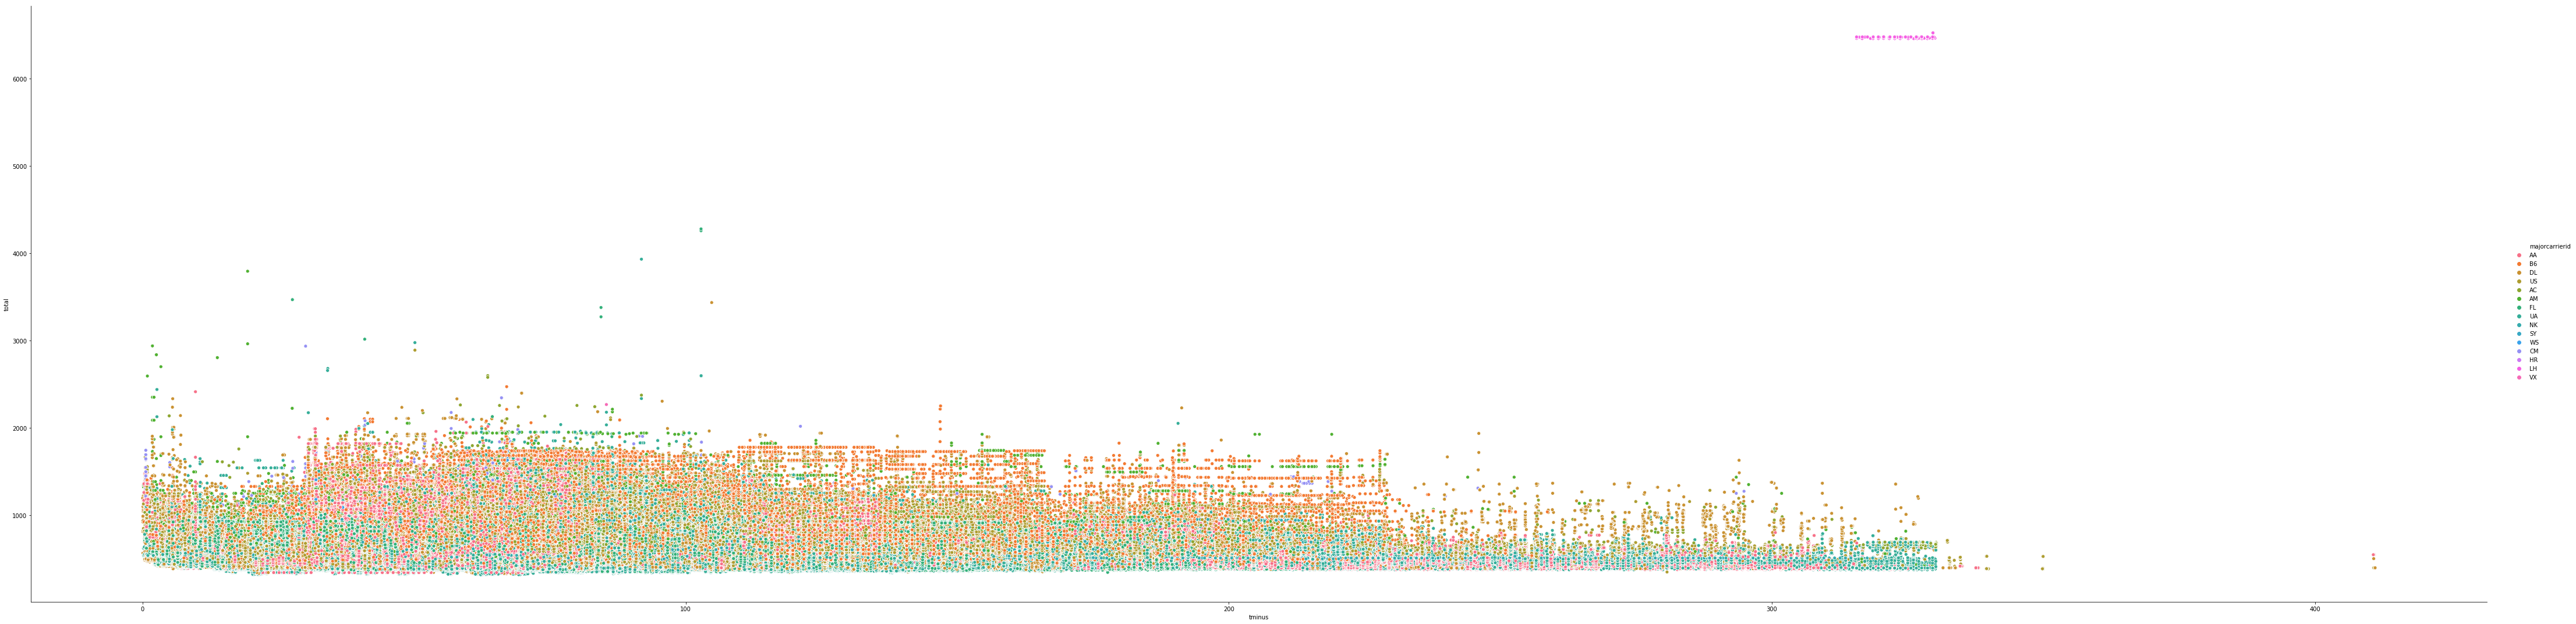

In [13]:
sns.relplot(x="tminus", y="total", hue="cab", data=boscun, height=15, aspect=4);

In [11]:
boscun['majorcarrierid'].unique()

array(['AA', 'B6', 'DL', 'US', 'AC', 'AM', 'FL', 'UA', 'NK', 'SY', 'WS',
       'CM', 'HR', 'LH', 'VX'], dtype=object)

In [ ]:
airlines = {'AA':'American Airlines', 'AC':'Air Canada', 'B6':'Jet Blue', 'DL':'Delta', 'US':'US Airways'}